In [10]:
import numpy as np
import numpy.linalg as la
import scipy.optimize as opt
from pipeline import *
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8, 6)
%matplotlib notebook

In [5]:
data = np.load('correctdmdata/20.9svddm.npz')['arr_0']

In [13]:
binneddata = bin_data(data, time_bin_sz=5, freq_bin_sz=16)
bdat_u, bdat_s, bdat_vh = la.svd(binneddata.T)
if bdat_vh[0, 0] < 0:
    bdat_u *= -1
    bdat_vh *= -1

<IPython.core.display.Javascript object>


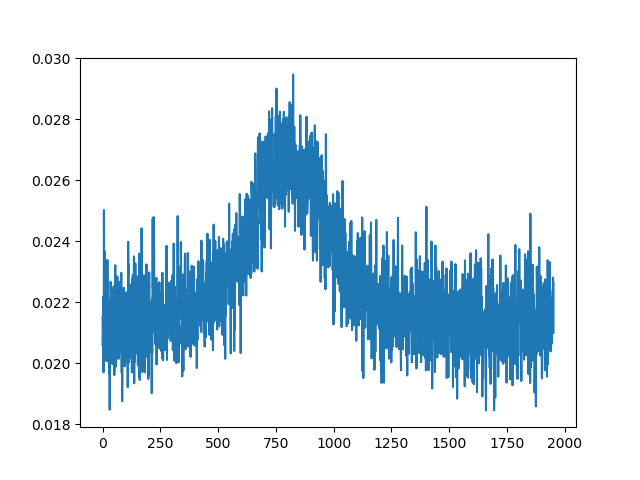

In [17]:
plt.plot(bdat_vh[0, :])

In [18]:
svd_1m = bdat_vh.copy()

<IPython.core.display.Javascript object>


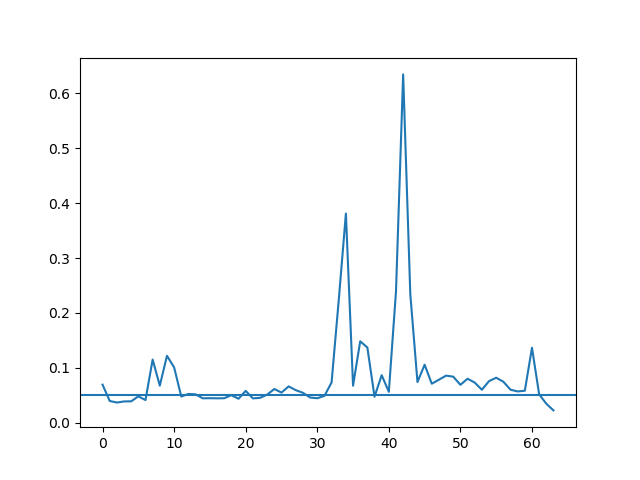

In [19]:
plt.plot(bdat_u[:, 0])

In [20]:
plt.axhline(0.05)

In [21]:
_i20.remove()

AttributeError: 'str' object has no attribute 'remove'

<IPython.core.display.Javascript object>


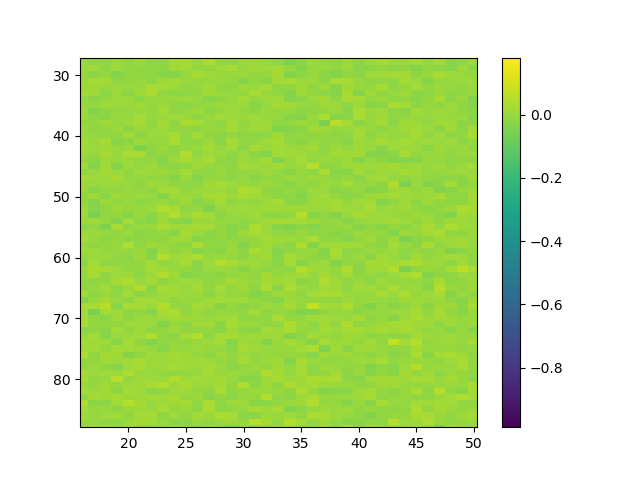

In [22]:
plt.imshow(bdat_vh, aspect='auto')

In [23]:
plt.colorbar()

<IPython.core.display.Javascript object>


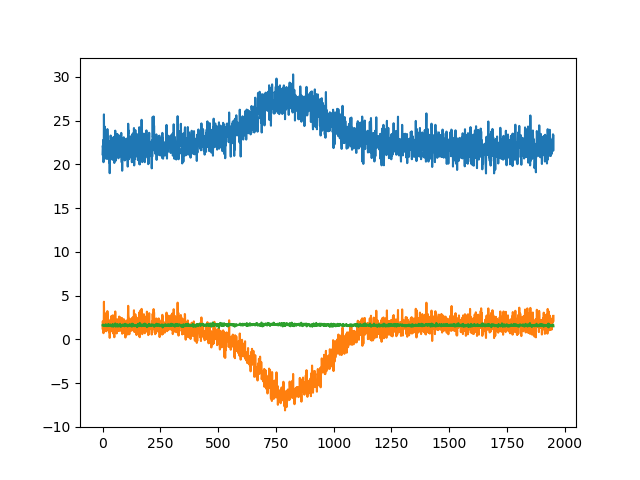

In [31]:
for i in range(2):
    plt.plot(bdat_s[i] * bdat_vh[i])

In [32]:
np.mean(binneddata)

2.0000863

In [33]:
np.min(binneddata), np.max(binneddata)

(0.34843883, 20.187786)

<IPython.core.display.Javascript object>


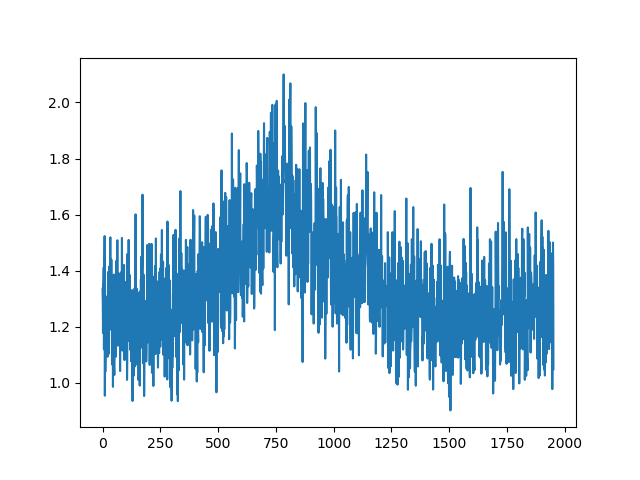

In [36]:
plt.plot(binneddata[:, 20])

In [41]:
def fit_1m_to_data(x, scale):
    return bdat_s[0] * bdat_vh[0, x] * scale

In [42]:
popt, _ = opt.curve_fit(fit_1m_to_data, np.arange(binneddata.shape[0]), binneddata[:, 20], p0=1)

<IPython.core.display.Javascript object>


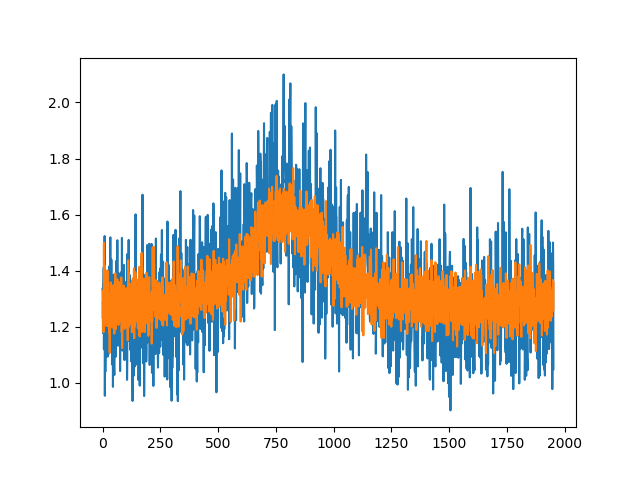

In [44]:
plt.plot(binneddata[:, 20])
plt.plot(fit_1m_to_data(np.arange(binneddata.shape[0]), popt))

<IPython.core.display.Javascript object>


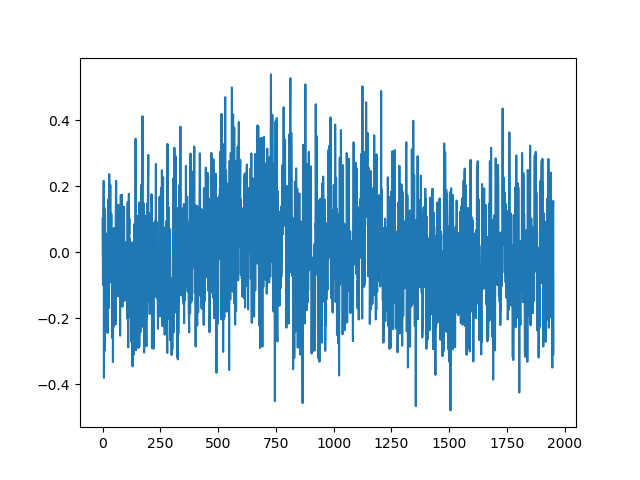

In [45]:
plt.figure()
plt.plot(binneddata[:, 20] - fit_1m_to_data(np.arange(binneddata.shape[0]), popt))